## In Class: 2019/01/14
## Projective transforms

Your task for the day is to write a program that simulates taking a digital photograph.  Imagine that we have a camera positioned at the origin, with a focal length of 1000 pixels and a sensor size of 2000 x 1000 pixels.  Coordinates.txt contains $p$ (point coordinates) and $I$ (intensity values) of a simulated landscape.  Use a projective transform to simulate a digital image of the landscape.  (Don't forget to crop your image to the sensor size). 

Some relevant equations:

3D world coordinates to generalized camera coordinates:
$$x = p_0/p_2$$
$$y = p_1/p_2$$

generalized camera coordinates to pixel values:
$$ u = f x + c_x $$
$$ v = f y + c_y, $$
where $u$ and $v$ are the pixel locations, $f$ is the focal length, and $c_x$ and $c_y$ are the pixel coordinates of the image center.  

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# 
#  
#
data = np.loadtxt("coordinates.txt")

focal_length = 1000
sensor_x = 2000
sensor_y = 1000

p0 = data[:, 0]
p1 = data[:, 1]
p2 = data[:, 2]

I = data[:, 3]

# all we're doing is mapping coordinates 
# x, y, z -> u, v

x = p0/p2
y = p1/p2

u = focal_length*x + sensor_x / 2
v = focal_length*y + sensor_y / 2 # the coordinates that input intensities map to
u = u.astype(np.int) # these should be indices in our output array
v = v.astype(np.int)


In [36]:
r = 3

out = np.zeros((sensor_y, sensor_x))

for ii, uu, vv in zip(I, v, u):
    try:
        out[uu-r:uu+r, vv-r:vv+r] = ii
    except:
        pass
out[out == 0] = np.nan

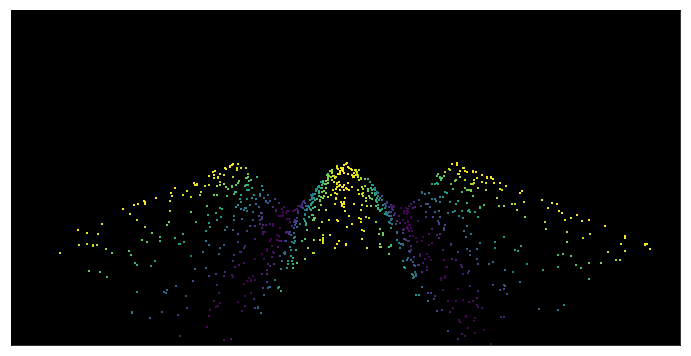

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('black')
ax.imshow(out)
ax.set_xticks([])
ax.set_yticks([])
plt.show()